# Two sum

*Michael Snowden*, 23 December 2023 

This essay aims to solve the [Two Sum](https://leetcode.com/problems/two-sum/) problem from
[LeetCode](https://leetcode.com/). This classic computational problem is reasonably simple to
understand, yet can yield some interesting algorithms when searching for an efficient solution. In
this essay we will explore, analyse, and compare a small selection of these solutions using
theoretical and empirical methods. The end goal is to find a solution that is clear, efficient, and
easy to implement.

It is assumed the reader has an intermediate understanding of Python, including aspects like
importing modules, using loops, and applying conditionals and assignments. We will be using Python
data structures such as lists and dictionaries to implement our solutions.

Furthermore, the essay uses Big-Oh notation and refers to concepts such as binary search and
brute-force.

## 1 Problem definition

To effectively solve Two Sum, it is crucial that we thoroughly understand and define the problem. We
need to identify the inputs, outputs and any relationship between them. For the Two Sum problem,
LeetCode has provided the following clear and concise problem description.

"*Given an array of integers `nums` and an integer `target`, return indices of the two numbers such
that they add up to target.*"

And the following clarifications.

"*You may assume that each input would have **exactly one solution**, and you may not use the same
element twice. You can return the answer in any order.*"

Finally some conditions on the inputs and outputs stated.

 - *$-109 \leq$ `nums[i]` $\leq 109$*
 - *$-109 \leq$ `target` $\leq 109$*
 - *Only one valid answer exists.*

We now translate the problem into the following template.

**Function**: two_sum
**Inputs**: `nums`, a list of integers; `target`, an integer
**Preconditions**:
- $-109 \leq$ `nums[i]` $\leq 109$
- $-109 \leq$ `target` $\leq 109$
-  Exactly one pair `a` and `b` in `nums` has `a` + `b` = `target`

**Output**: `indices`, a list of integers
**Postconditions**:
- `len(indices)` = 2;
- `nums[indices[0]]` + `nums[indices[1]]` = `target`

This template expands and formalises the notions of input and output. It tells us the conditions
that must be satisfied before and after any algorithm is run and what it means for our algorithm to
be correct. We can refer back to this template throughout the process of solving the problem.

## 2 Algorithms

With our problem clearly defined, the next step is to think of ways to solve it. This section
presents three distinct approaches to solving Two Sum: brute force, sorting and mapping.


### 2.1 Brute force

A brute force approach can often feel intuitive. For example, we can sum every number in `nums` with
every other number and see if our sum matches the `target`. If it does, then we have found our
solution. That sounds simple enough right? We are checking all possible sums, so we are sure to find
our indices if they exist. Looking back at the preconditions in our template, we can see that each
problem instance must have exactly one pair that sums to `target`. Hence, this approach is
guaranteed to find a solution as long as our preconditions are met.

You might already suspect that this solution won't be very efficient, and you might just be right.
However, this approach is almost certain to produce the correct output and that is the most
important aspect of any algorithm. Getting _any_ working solution regardless of efficiency is an
important first step. Sometimes we just need to solve a problem quickly, and more importantly it
gets us thinking through the problem, which can lead to the discovery of other solutions.

Now that We have an initial idea for our algorithm, let us start the process of formalising it. Here
is the same idea, but described in a more precise and programming oriented language.

>An outer loop iterates through each number in `nums`, then for each number, an inner loop iterates
>`nums` again. For each pair of numbers, if their indices are different and their sum matches
>`target`, return their indices.

After this initial description, we formalise the algorithm further by writing it as a series of
stepped instructions in a pseudocode like way. It is often easier to reason about efficiency and
correctness with the algorithm in this form.

```text
1. for each index_1 from 0 to len(nums)-1:
    1. for each index_2 from 0 to len(nums)-1:
        1. if index_1 != index_2 and nums[index_1] + nums[index_2] == target:
            1. let indices be (index_1, index_2)
            2. stop
```

We finish up by analysing the time complexity. Let _n_ = `len(nums)`, then this algorithm has two
nested for loops that do _n_ iterations each. The operations performed within the inner loop are
constant time, meaning this solution will do at most _n_ $\times$ _n_ $\times$ O(1) steps. The
worst-case time complexity is therefore O(_n_ $^2$). In the best case, the first and second numbers
in `nums` would sum to target, so no matter the size of `nums` the run-time would not increase.
Therefore, the best-case time complexity would be O(1).


### 2.2 Sorting

For many computational problems a good question to ask is: will sorting the inputs simplify the
problem and lead to a more efficient solution? In this case, the answer is yes, we can exploit the
properties of a sorted input in a similar way to binary search. Rather than focusing on the middle
of the sequence, we keep track of the two ends with position variables. This kind of approach is
commonly referred to as a "double pointer algorithm" named after the two position variables.

Before we move on to a formal description of the algorithm,  we need to consider a crucial aspect of
the Two Sum problem: it requires _indices_ to be returned. This has implications for our solution:
direct sorting of `nums` is not possible because the original index positions would be altered.
Thus, any additional data structures we use must keep track of the corresponding indices from
elements of `nums`. Keeping this in mind, here is the description of our algorithm.

>Create a pair `(number, index)` for each number in `nums`. Add each pair to a list `pairs`, then
>sort the list into ascending order based on the numbers. Initialise two variables `start` and `end`
>to be 0 and `len(nums) - 1` respectively. While `start` $\neq$ `end` sum the numbers in `pairs`
>corresponding to the indices `start` and `end`. If the sum is less than `target`, move `start` to
>the right by incrementing its value by one. If the sum is greater than `target`, move `end` to the
>left by decrementing its value by one. If the sum matches `target` then return the indices of both
>numbers.

The logic of this strategy is as follows. The sum of the numbers at positions `start` and `end` in
our `pairs` list will be one of the following three cases: the sum can be equal to, greater than or
less than `target`. If the sum is equal to target, then we have found our match and can return the
indices. If the sum is less than target, we need to increase the value of our sum; the only way to
do this is by moving `start` to the right. Remember we have sorted the list, so all values to the
right are greater. If our sum is greater than `target` we need to decrease the value of our sum,
and the only way to do that by moving `end` to the left.

We can now express our algorithm as a series of numbered steps and analyse the complexity.

```text
1. let pairs be an empty list
2. for each index from 0 to len(nums):
    1. let `pair be (nums[index], index)
    2. append pair to `pairs`
3. let pairs be sorted by value at first index
4. let start = 0
5. let end = len(nums) -1
6. while start $\neq$ end:
    1. pair_sum = pairs[start][0] + pairs[end][0]
    2. if pairs_sum = target:
        1. let indices be (pairs[start][1], pairs[end][1])
        2. stop
    3. otherwise if pairs_sum > target:
        1. let end = end - 1
    4. otherwise:
        1. let start = start + 1
```

The important parts of this algorithm with respect analysing time complexity are: the for loop at
step number two, the sorting operation at step number three and the while loop at step number six.

Let _n_ = `len(nums)`, then the for loop always does _n_ iterations, and we will assume the sorting
operation has worst-case complexity of O(nlog(n)) and best-case of O(n), that just leaves us with
the while loop. The while loop will do at most _n_ iterations in a scenario where one of the
variables `start` or `end` stays in place and the other is incremented until they are next to each
other.

It is clear now that the growth rate of the sorting operation will dominate this approach in terms
of complexity. Therefore, this algorithm has an overall worst-case time complexity of O(nlog(n)) and
a best-case of O(n).

### 2.3 Mapping

In the previous algorithm we paired each number in `nums` with its index out of necessity. We wanted
to sort `nums` without loosing the original paring of number to index. This action of pairing
numbers to indices is a useful idea; what if instead of pairing a number directly to its index, we
paired the difference between our number and the target number (i.e. `target` - number) to its
index? If we did that, then finding our pair would be a case of seeing if the current number already
exists as a value in our pairs list.

This is a good start, but we still have a problem: checking for the existence of an item in a a list
has linear time complexity in the size of the list. We need an alternative data structure, one with
much efficient lookup times.

If fast lookup times are required, then we should always consider a hashtable. This data structure
is known informally by many different names such as dictionary, hashmap, map and associative array.
A key property of this data structure is the lookup operation has constant time complexity in the
average case.

If we map our difference ( i.e., `target` - number) to the index of the number in a hashtable, then
we can check for the existence of further numbers in constant time. If the number exists, then we
have found our matching number and can easily retrieve its index. Next we write our description.

>For each number in `nums`, check if it exists in the map. if it does, return the current index
>alongside the index mapped to that number. If it is not in the map, calculate the difference target
>- current number and add the difference as key and current index as value to the map

Then moving on to a more formal algorithm:

```text
1. let differences be an empty dictionary
2. for index from 0 to len(nums) - 1:
    1. if nums[index] in differences:
        1.let indices be (differences[nums[index]], index)
        2. stop
    2. otherwise:
        1. let difference = target - nums[index]
        2. let differences[difference] = index
```

Let _n_ = `len(nums)`, then this algorithm has a single loop that does _n_ iterations. Because we
are using a hashtable, all the operations within the loop are constant time. Therefore our mapping
differences algorithm has O(_n_) time complexity in in the worst-case. Similar to the brute force
approach if the correctly summing numbers are in the first two positions in `nums` then the
run-times will be unaffected by increasing input sizes giving a best-case complexity of O(1).

### 2.4 Summary

Many times a brute force approach can be the simplest solution; it is a simple strategy that is easy
to implement. Furthermore, this strategy is more efficient in terms of memory usage than the other
two because it does not use extra data structures. However, this approach has O(_n_ $^2$) time
complexity. Every time we double the input size, the run-times increase fourfold, which is not very
desirable especially if there are better options.

Our next approach used sorting to endow our list with properties useful for searching. This
algorithm is perhaps the most convoluted and maybe harder to think through relative to the others.
Furthermore, it requires extra memory compared to the brute force approach. The benefits of the
strategy are the  O(_n_ log(_n_)) time complexity which improves considerably on the brute force
algorithm.

The third solution made a single pass through `nums` and used a hashtable to map differences to
indexes. While not as simple as the brute force algorithm, this approach is not hard to follow or
understand; everything is carried out in a single loop. On the other hand, this approach has the
additional memory overhead of the hashtable itself, which needs to be taken into account. The main
advantage with this approach is the O(n) time complexity for the worst-case, making it the most
efficient when it comes to scaling run-times with input size.

When considering all three approaches, and taking into account aspects of efficiency as well as
readability, the mapping algorithm seems to come out on top. It makes that that classic space-time
trade off i.e sacrifices some memory efficiency for time efficiency, but the simplicity of the
approach combined with the efficient time complexity makes it a worth while exchange.

## 3 Code

In this section we shall implement the algorithms written in previous parts of the essay.  We shall
do so using a basic subset of Python in the hope of making our code as language agnostic as
possible.

Throughout this section we will make use of code quality tools such as linters and type checkers to
help us meet the standards expected for clean readable and error free code.

 ### 3.1 Preparation and imports

The next two cells set up the automatic type checking linting and Construct checking for our code
cells. We also import some of the functions we will use to test, time and generate instances for our
solutions.

If one or more of the styling or type checking ideals are violated, the warnings will be printed
with the corresponding line number underneath the offending cell.

In [1]:
import random
from algoesup import test, time_functions, time_cases


%pytype on
%ruff on
%allowed on

pytype was activated
ruff was activated
allowed was activated


### 3.2 Testing

Before We start implementing the algorithms, we think about writing some unit tests. The `test()`
function from the `algoesup` library is a simple way to test for correctness. It takes a function
and a test table then reports any failed tests.

To thoroughly test the algorithms, we need to consider edge cases alongside other important
functional tests. Edge cases often occur at the extreme ends of the spectrum of allowed inputs or
outputs, they should ideally test unexpected conditions that might reveal bugs in the code. For the
two sum problem, we should test the minimum size for `nums` and also the extremes of the values that
can be present. We should include negative numbers and zero in our tests because integers are
present in the inputs.

The cell below contains our test table, note the descriptions of each case in the first column, and
how the boundary cases, negative numbers and zero are all present in the table. To help clarify the
contents of the table it has been displayed underneath the cell.

In [2]:
two_sum_tests = [
    ["minimum size for nums", [1, 2], 3, (0, 1)],
    ["non-adjacent indices", [1, 4, 9, 7], 8, (0, 3)],
    ["first two elements", [5, 7, 1, 2, 8], 12, (0, 1)],
    ["last two elements", [1, 3, 5, 7, 8], 15, (3, 4)],
    ["repeated elements", [6, 2, 3, 2], 4, (1, 3)],
    ["max and min range", [-109, 109, 0], 0, (0, 1)],
    ["lowest target value", [-50, 1, -59], -109, (0, 2)],
    ["highest target value", [50, 1, 59], 109, (0, 2)],
]

### 3.3 Implementations

The next cell implements the brute force algorithm using nested `for` loops with a conditional to
check for the correct pair. Note how this conditional check looks similar to one of the
preconditions to the template. This is a good sign. The tests are performed below the function

In [3]:
def two_sum_bf(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    for index_1 in range(len(nums)):
        for index_2 in range(len(nums)):
            if index_1 != index_2 and nums[index_1] + nums[index_2] == target:
                return index_1, index_2
    return (-1, -1)


test(two_sum_bf, two_sum_tests)

Testing two_sum_bf:
Tests finished.


Next up is the sorting approach. Again, the tests are performed underneath the function definition.

In [4]:
def two_sum_sort(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    pairs = []
    for index in range(len(nums)):
        pairs.append((nums[index], index))
    pairs.sort()
    start = 0
    end = len(nums) - 1
    while start < end:
        current_sum = pairs[start][0] + pairs[end][0]
        if current_sum == target:
            # return the indices in ascending order for reliable testing
            lower_index = min(pairs[start][1], pairs[end][1])
            upper_index = max(pairs[start][1], pairs[end][1])
            indices = (lower_index, upper_index)
            return indices
        if current_sum < target:
            start = start + 1
        else:
            end = end - 1
    return (-1, -1)


test(two_sum_sort, two_sum_tests)

Testing two_sum_sort:
Tests finished.


Finally, the mapping algorithm is implemented using Python's `dict`.

In [5]:
def two_sum_map(nums: list, target: int) -> tuple[int, int]:
    """Given a list of integers return the indices of the pair that sums to target.

    Preconditions:
        len(nums) >= 2
        -109 <= nums[i] <= 109
        -109 <= target <= 109
        Exactly one pair a and b in nums has a + b = target
    """
    differences: dict[int, int] = {}
    for index in range(len(nums)):
        difference = target - nums[index]
        if nums[index] in differences:
            return differences[nums[index]], index
        differences[difference] = index
    return (-1, -1)


test(two_sum_map, two_sum_tests)

Testing two_sum_map:
Tests finished.


**allowed** found issues:
- 10: differences: dict[int, int] = {}

The brute force algorithm comes out on top in terms of simplicity, it is just a case of checking
every pair of numbers. The double pointer approach seems like the most convoluted with the mapping
differences algorithm somewhere in the middle of the two.

## 4 Performance

In this section we will measure the run-times of our solutions under various conditions to see if
our theoretical analysis matches empirical data.

### 4.1 generating inputs

`time_functions` and `time_cases` from the `algoesup` library require a function that generates
problem instances of a given size. We want to be able to generate instances that correspond to best,
normal and worst cases for the solutions were appropriate.

The best normal and worst case scenarios might not always be the same for each algorithm, for
example, the best-case for `two_sum_bf` and `two_sum_map` would be when the first two numbers
encountered sum to `target` but this is not the case for `two_sum_sort` where the best-case would be
dependent on the sorting.

Since `two_sum_bf` and `two_sum_map` share the same best- and worst-case scenarios, we shall focus
on those for our input generators. For the normal-case the matching numbers will be in the middle
two positions of `nums`

In [6]:
def two_sum_instance(size: int, scenario: str) -> tuple[list[int], int]:
    """Given a size, generate a problem instance for two sum.

    Preconditions: size >= 2; scenario in {"best", "normal", "worst"}
    """
    num1 = random.randint(-109, 109)
    num2 = random.randint(-109, 109)
    target = num1 + num2
    nums = [num1, num2]
    while len(nums) < size:
        new_num = random.randint(-109, 109)
        valid = True
        for num in nums:
            if target - new_num == num:
                valid = False
        if valid:
            nums.append(new_num)
    if scenario == "worst":
        nums = nums[2:] + nums[:2]
    elif scenario == "normal":
        middle = len(nums) // 2
        nums = nums[2:middle] + nums[:2] + nums[middle:]
    # else nums is already best case
    return nums, target


def best(size: int) -> tuple[list[int], int]:
    """Given a size, generate a best case instance for two sum.

    Preconditions: size >= 2
    """
    return two_sum_instance(size, "best")


def normal(size: int) -> tuple[list[int], int]:
    """Given a size, generate a normal case instance for two sum.

    Preconditions: size >= 2
    """
    return two_sum_instance(size, "normal")


def worst(size: int) -> tuple[list[int], int]:
    """Given a size, generate a worst case instance for two sum.

    Preconditions: size >= 2
    """
    return two_sum_instance(size, "worst")

**allowed** found issues:
- 6: random.randint
- 7: random.randint
- 11: random.randint

### 4.2 Best, normal and worst case run-times

First let us see the run-times of `two_sum_bf` for best, normal and worst-case instances. Note the
input size starts at 100 and is doubled 4 times reaching 1600 for the last data point.

Run-times for two_sum_bf

Input size           worst          normal            best 
       100           691.5           332.8             0.5 µs
       200          2636.6          1322.9             0.5 µs
       400         11522.6          5523.5             0.5 µs
       800         47048.4         23079.0             0.5 µs
      1600        187819.3         91964.2             0.5 µs

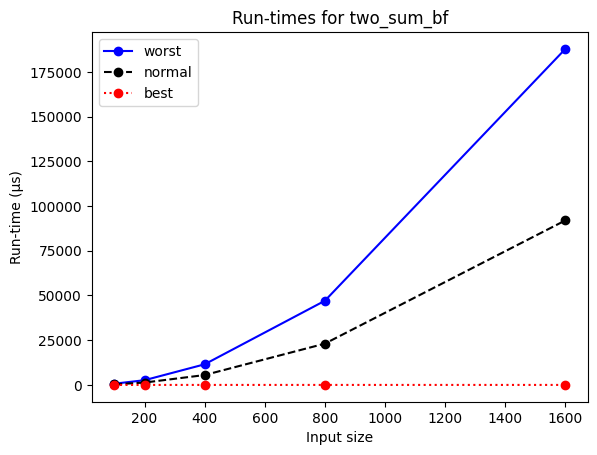

In [7]:
input_generators = [worst, normal, best]
time_cases(two_sum_bf, input_generators, start_size=100, double=4, chart=True)

We can see from the chart and run-times above that our analysis seems to line up with the data. As
we double the input size for the brute force algorithm, the run-times quadruple, as you would expect
for quadratic time complexity. For the best case the run-times more or less stay the same for
increasing inputs suggesting constant time complexity. The normal case is somewhere in the
middle of the two.

Now let us do the same for `two_sum_map`.

Run-times for two_sum_map

Input size           worst          normal            best 
       100             9.8             4.9             0.4 µs
       200            17.6             8.9             0.5 µs
       400            35.9            17.8             0.5 µs
       800            82.9            37.0             0.5 µs
      1600           163.1            75.7             0.5 µs

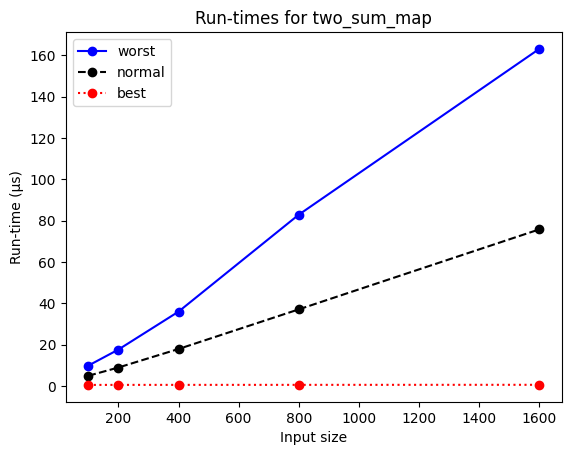

In [8]:
input_generators = [worst, normal, best]
time_cases(two_sum_map, input_generators, start_size=100, double=4, chart=True)

The first thing to notice is the dramatic reduction in magnitude of the run-times. The scale on the
y-axis for this graph only goes up to 200 µs whereas the previous graph went up to 20000 µs, which
is 10 times larger. Also the plot for our worst-case here has a much straighter line with run-times
doubling in proportion with input size. This aligns with our prediction of linear time complexity.

### 4.3 Run-times for each solution

Let us now compare the runtimes for all three solutions side by side using the input generator for
the worst case.

Inputs generated by worst

Input size      two_sum_bf    two_sum_sort     two_sum_map 
       100           704.5            23.6             9.2 µs
       200          2648.3            42.8            18.9 µs
       400         11676.1           102.9            35.7 µs
       800         47242.8           222.1            73.9 µs
      1600        189691.0           487.6           173.9 µs

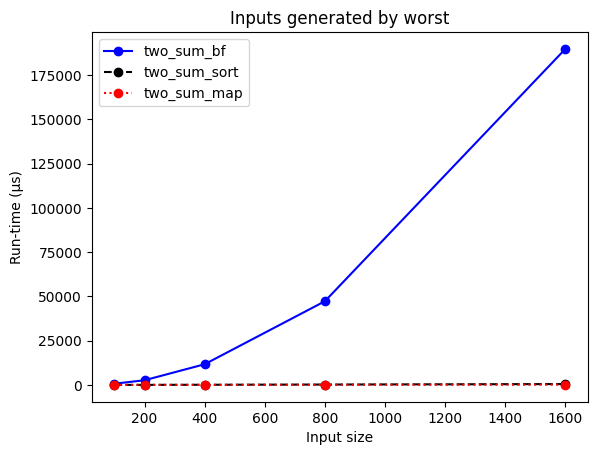

In [9]:
solutions = [two_sum_bf, two_sum_sort, two_sum_map]
time_functions(solutions, worst, start=100, double=4, chart=True)

The run-times for `two_sum_bf` almost instantly eclipse that of `two_sum_sort` and `two_sum_map`. It
almost looks as if the run-times for `two_sum_sort` and `two_sum_map` are not growing at all, but we
know by looking at numbers above that this is not the case. Let us see if we can adjust the inputs
of `time_functions` so the growth rates of the fastest two functions have a better visual
representation in the chart.

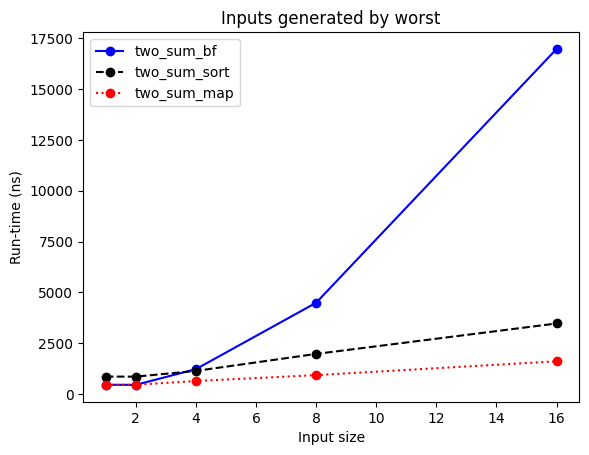

In [10]:
solutions = [two_sum_bf, two_sum_sort, two_sum_map]
time_functions(solutions, worst, start=1, double=4, text=False, chart=True)

This chart illustrates better the point at which the three solutions start to diverge in terms of
growth rates.

The growth rate of the brute force approach still accelerates off into the stratosphere, but we can
see the separation and trend of the sorting and mapping algorithms.

## 5 Conclusion

We started this essay by precisely defining the Two Sum problem that we wanted to solve. We came up
with three algorithms that used different approaches: brute force, sorting and mapping and analysed
the time complexity of each. Next, we implemented and tested our solutions using Python, then in the
penultimate section used empirical testing to see if our analysis matched up with the data. Now we
must decide which of our algorithms is best and explain what criteria we are basing "best" upon.

The brute force approach is not very efficient in terms of run-times. We suspected this would be the
case, then the empirical data confirmed it. Its only saving grace was the simplicity and efficient
memory usage, but we cannot ignore the quadratic time complexity for the worst-case. For this reason
it cannot be the best solution.

We are now left with a choice between the sorting and mapping approaches and I think there is a
clear winner between the two. The mapping approach is more efficient in its worst-case complexity
with O(_n_) compared to O(_n_log(_n_) of the sorting, and on the surface seems simpler and easier to
implement. Moreover, the mapping approach has the potential to be more memory efficient. For
example, the sorting approach always has an auxiliary data structure the same size as `nums`,
whereas the size of the dictionary will grow dynamically, only becoming the same size as `nums` in
the worst case. Therefore, we conclude that the mapping algorithm is the best of the three.
